# Introduction To Neural Network Classification Using TensorFlow

Types of Classification :-
- Binary Classification
- Multi-Class Classification
- Multi-Label Classification

## Creating Data To View and Fit the Model

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=38)

In [2]:
X[:10]

array([[-0.10238924,  0.73469419],
       [-0.90294102,  0.43066422],
       [ 0.9673709 ,  0.1034921 ],
       [ 0.46361003,  0.87768086],
       [ 0.55258119, -0.85737417],
       [-0.62125488, -0.74990112],
       [-0.75152876, -0.14894434],
       [ 0.69147032, -0.38863828],
       [-0.4832384 , -0.64813623],
       [ 0.30820866, -0.76472142]])

In [3]:
y[:10]

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 150

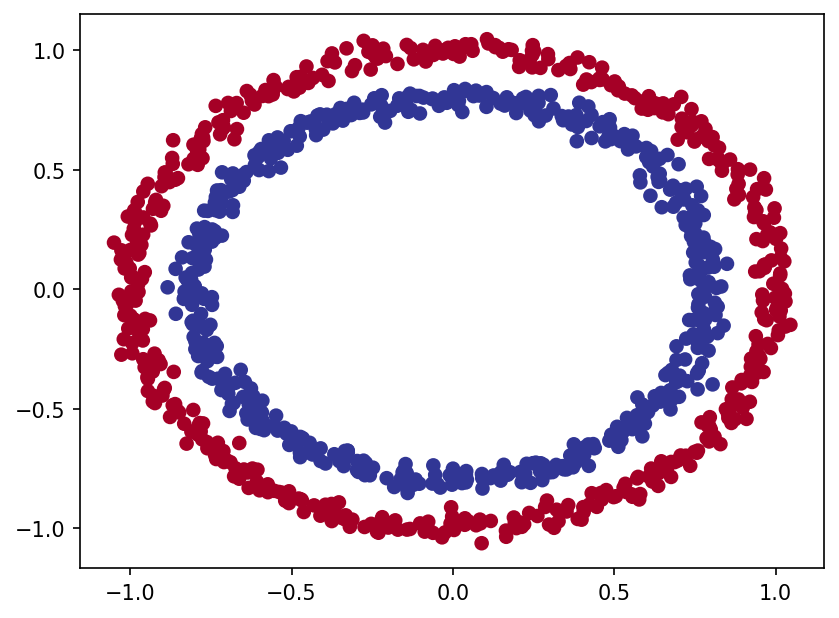

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

## Creating a test model

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
import tensorflow as tf

In [8]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

model_1.fit(X_train, y_train, epochs=200)

Epoch 1/200
25/25 [==============================] - 1s 3ms/step - loss: 2.2541 - accuracy: 0.5063
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.8541 - accuracy: 0.5063
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7821 - accuracy: 0.5063
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7441 - accuracy: 0.5063
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7215 - accuracy: 0.5063
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7073 - accuracy: 0.5063
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.5063
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5063
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5050
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4625
Epoch 11/

In [9]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5800


[0.6941967606544495, 0.5799999833106995]

## Improving Our Model

To improve our model, we will make a new function - `plot_decision_boundary()` which will:
1. Take trained model, features *X* and labels *y*
2. Create a `meshgrid` of different *X* values
3. Make predictions across the `meshgrid`
4. Plot predictions as well as a line between zones (where each unique class falls)

In [10]:
import numpy as np

In [11]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_preds = model.predict(x_in)

    print("Doing binary classification")
    y_preds = np.round(y_preds).reshape(xx.shape)

    # Plotting the decision boundary
    plt.contourf(xx, yy, y_preds, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
Doing binary classification


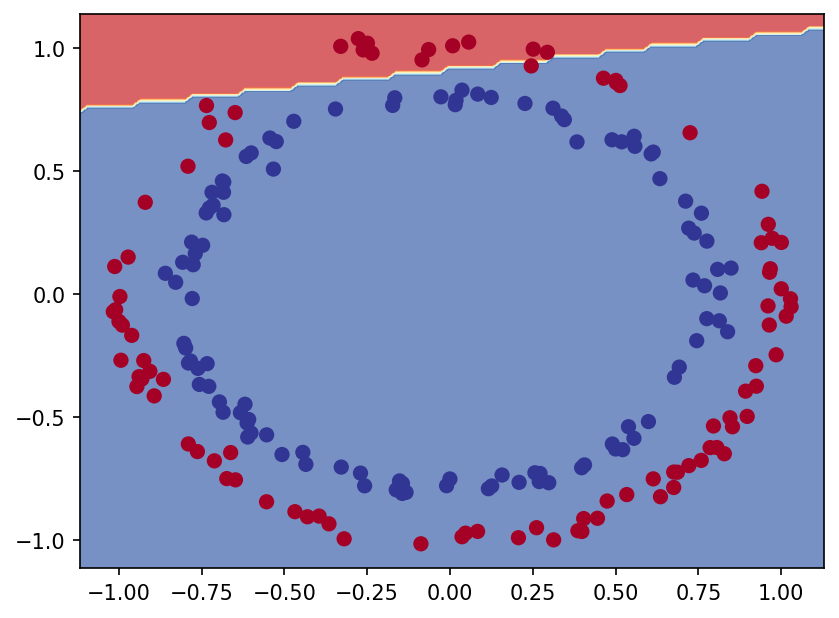

In [13]:
# Check out the predictions our model is making
plot_decision_boundary(model_1, X_test, y_test)

In [14]:
tf.__version__

'2.10.0'

313/313 [==============================] - 1s 2ms/step
Doing binary classification


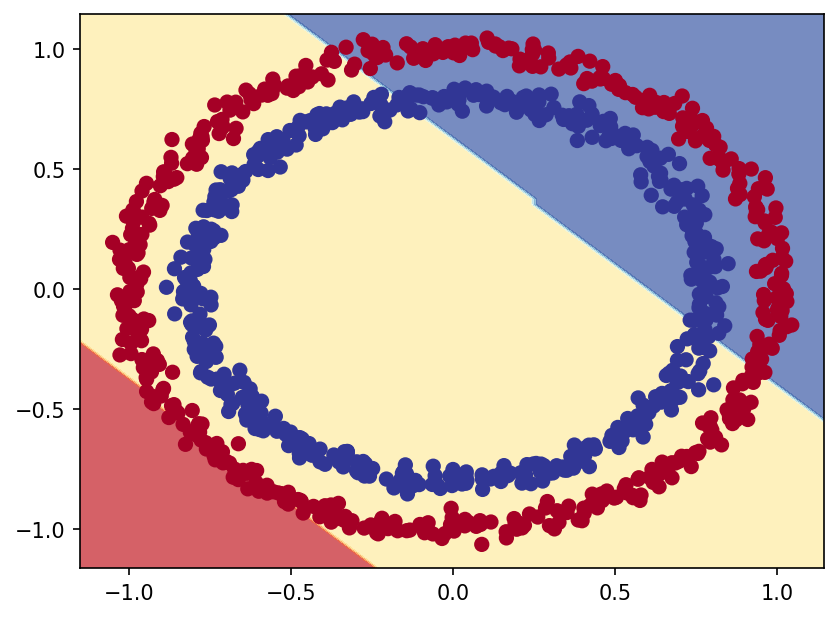

In [15]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

model_2.fit(X, y, epochs=100, verbose=0)

plot_decision_boundary(model_2, X, y)

## The Missing Piece :- *Non-Linearity*